**Problem Statement:** 
Kozmos, a retailer specializing in home textiles and everyday clothing, seeks to establish a strong presence on Amazon.

**Focus Area:** 
The primary focus is on enhancing customer satisfaction and optimizing sales performance.

**Objective Definition:** 
The objective is to analyze Amazon reviews to uncover emotional patterns and discern customer preferences effectively.

**Approach Strategy:** 
Utilizing sentiment analysis on customer reviews to classify sentiments, aiding Kozmos in refining product features and driving sales based on customer feedback.

**End Goal Achievement:** 
The ultimate aim is to leverage customer feedback efficiently to improve products and boost sales performance.

**Dataset Origin:**

The dataset consists of Amazon reviews for Kozmos's home textile and everyday clothing products, encompassing a diverse array of customer insights collected over various periods.

**Attributes:**

* **Star:** The rating out of 5 stars that the reviewer has given to the product.
* **HelpFul:** A count of how many people found the review to be helpful.
* **Title:** The title of the review, summarizing the reviewer's sentiment or focus.
* **Review:** The full text of the customer's review, providing detailed feedback.

#  **Importing Libraries**

In [59]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud

In [60]:
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.noun  
  inflating: /usr/shar

In [61]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

# **Adjusting Row Column Settings**

In [62]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Text Preprocessing**

In [63]:
df = pd.read_excel("/kaggle/input/amazon-reviews/amazon.xlsx")

In [64]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


# **Case Folding**

In the first step, we converted the comments in the 'Review' column to lowercase. This standardizes the data into a uniform format, removing inconsistencies caused by case differences during text processing.

In [66]:
df['Review']=df['Review'].str.lower()

In [67]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

# **Remove Punctuations**

In this step, we removed punctuation marks from the comments in the 'Review' column. This process aims to improve the efficiency of our language processing tasks by cleaning the text data, making it more suitable for analysis.

In [68]:
df['Review']=df['Review'].str.replace('[^\w\s]','')

In [69]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

# **Remove Numbers**

In this step, we removed numerical characters from the 'Review' column. This allows us to focus on the textual content, making our language processing and text analysis tasks more effective and meaningful.

In [70]:
df['Review']=df['Review'].str.replace('\d','')

In [71]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

# **Remove Stopwords**

In this section, we removed common stop words (like 'the', 'is', 'in') to focus our analysis on more meaningful words. This enhances our understanding of the comments and improves the efficiency of our NLP processes.

In [72]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
sw=stopwords.words('english')

In [74]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [75]:
df['Review']

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme studio/li...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

# **Rare words**

In this step, we combined all comments in the 'reviewText' column, split the text into words, and calculated the frequency of each word. We then removed words that appeared only once from the 'Review' column. This process eliminates low-frequency words, allowing our NLP analysis to focus on more significant terms.

In [76]:
pd.Series(' '.join(df['Review']).split()).value_counts()

love                1271
curtains            1251
like                1017
look                 818
great                721
                    ... 
inserts                1
months.<br>stood       1
bleak                  1
requested              1
studio/living          1
Name: count, Length: 10607, dtype: int64

In [77]:
temp_df=pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]

In [78]:
temp_df

lavender                1
taupe/gray/smoke/tan    1
pine                    1
#perfect                1
go's                    1
                       ..
inserts                 1
months.<br>stood        1
bleak                   1
requested               1
studio/living           1
Name: count, Length: 1000, dtype: int64

In [79]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))

In [80]:
df['Review']

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme area. pho...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

# **Tokenization**

In this step, we converted each comment in the 'Review' column into a TextBlob object and tokenized them into words. TextBlob simplifies the splitting of comments into manageable tokens (words), facilitating detailed NLP analyses on individual words within each comment.

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
df['Review'].apply(lambda x: TextBlob(x).words).head()

0                                              [happy]
1    [good, quality, material, however, panels, mis...
2    [product, fun, bedroom, windows, br, imagery, ...
3    [lo, unico, que, gustaria, es, que, sean, un, ...
4    [great, bang, buck, ca, n't, believe, quality,...
Name: Review, dtype: object

# **Lemmatization**

In this step, we lemmatized each word in the 'Review' column comments to derive their base forms. Lemmatization standardizes words (e.g., 'running' to 'run'), offering consistent and meaningful data processing for our NLP analyses.

In [83]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [85]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [86]:
df['Review']

0                                                   happy
1        good quality material however panel mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                                color way panel match
5608    great studio complement entire theme area. pho...
5609                    brought beauty kid room. love it.
5610    cute curtain son room! thick enough keep light...
Name: Review, Length: 5611, dtype: object

# **Text Visualization**

# **1. Calculation of Term Frequencies**

In this step, we computed the term frequencies (tf) of words in the 'reviewText' column. By counting how often each word appears in a comment and aggregating these counts, we created a DataFrame with columns for words and their respective frequencies. Sorting this DataFrame by frequency in descending order helps us identify and analyze the most common terms in our dataset, providing insights into prevalent words for visualization and analysis.

In [87]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [88]:
tf.columns = ["words", "tf"]

In [89]:
tf_sorted = tf.sort_values(by='tf', ascending=False)

In [90]:
tf_sorted

,words,tf
71,curtain,1773.00
45,look,1459.00
133,love,1412.00
188,like,1033.00
30,great,721.00
...,...,...
1620,explain..,1.00
1621,girls..,1.00
5592,say.,1.00
5591,popped,1.00


# **2.Bar Plots**

In this step, we filtered words with frequencies exceeding 500 and visualized their occurrences using a bar graph. This graph illustrates the most common words in our dataset and their prevalence, aiding in identifying key trends and patterns in the text data.

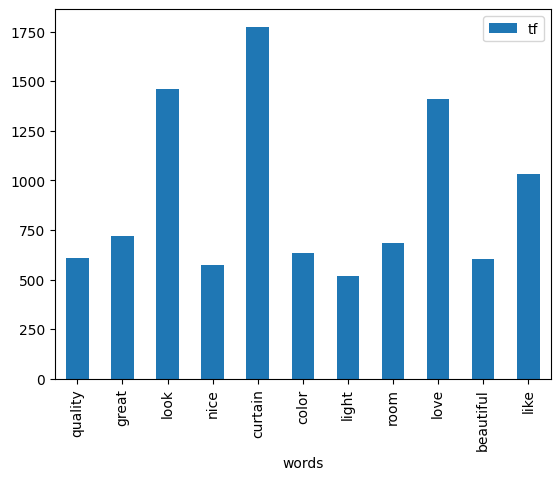

In [91]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

# **3.Word Cloud**
 

In this section, we generate and display a word cloud using the comments from the 'reviewText' column. This visualization highlights the frequently occurring words in the dataset, providing a clear representation of their significance and prevalence in the comments. It enables a rapid observation of key trends and notable features in the text data.







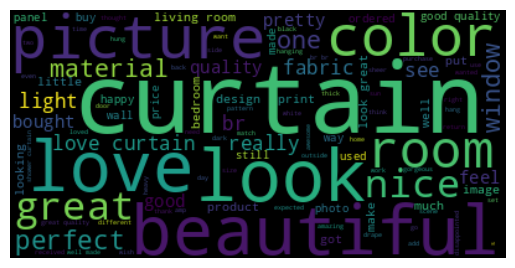

In [92]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Sentiment Analysis**

In this section, we'll conduct sentiment analysis on our text data. Using mathematical methods, we'll assess the emotional tone of the texts to determine if they're predominantly positive, negative, or neutral. This approach provides numerical values for sentiment, facilitating a more objective and measurable analysis.

In [93]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
df["Review"]

0                                                   happy
1        good quality material however panel mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                                color way panel match
5608    great studio complement entire theme area. pho...
5609                    brought beauty kid room. love it.
5610    cute curtain son room! thick enough keep light...
Name: Review, Length: 5611, dtype: object

In [95]:
sia = SentimentIntensityAnalyzer()

In [96]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...
7    {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [97]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.93
8   0.00
9   0.71
Name: Review, dtype: float64

In [98]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [99]:
df["polarity_score"] = df['Review'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [100]:
df.head(20)

,Star,HelpFul,Title,Review,polarity_score
0,5,0,looks great,happy,0.57
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.,0.44
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...,0.72
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00
4,5,0,Wow great purchase,great bang buck can't believe quality material...,0.90
5,5,0,Not for us,look different photo,0.00
6,5,0,Perfect for spa room,exactly looking for. heavy material. great pri...,0.62
7,5,0,Actually better than expected,"looking picture, thought curtain would thinner...",0.93
8,4,0,Not what expected,much whiter thought would wasn’t really expect...,0.00
9,5,0,Pretty as a Picture,curtain picture shows. 3rd set ambesonne curta...,0.71


In this section, we analyze the sentiment of the texts, labeling each comment as 'positive' (pos) or 'negative' (neg) based on its compound sentiment score. We then explore the distribution of these sentiment labels and their correlation with overall rating scores. Finally, we convert these labels into numerical values, facilitating their use in machine learning models. These steps aid in extracting valuable features from our text data, readying it for subsequent analysis and modeling.


In [101]:
df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [102]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.45
pos   4.57
Name: Star, dtype: float64

In [103]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,Sentiment_Label
0,5,0,looks great,happy,0.57,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.,0.44,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...,0.72,pos
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00,neg
4,5,0,Wow great purchase,great bang buck can't believe quality material...,0.90,pos


# **Modelling**

In [104]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [105]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [106]:
# TF-IDF N-Gram Level (2,2)
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2)).fit(train_x)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

# **Logistic Regression**

In [107]:
# Modelling(Logistic Regression - word level) 
log_model_word = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred_word = log_model_word.predict(x_test_tf_idf_word)

print(classification_report(y_pred_word, test_y))

              precision    recall  f1-score   support

         neg       0.31      0.97      0.47        72
         pos       1.00      0.89      0.94      1331

    accuracy                           0.89      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.89      0.91      1403



In [108]:
# Cross Validation
cross_val_score(log_model_word, x_test_tf_idf_word, test_y, cv=5).mean()

0.8538891713268937

In [109]:
# Randomly selecting comments from the data and asking them to the model
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model_word.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  liked much!!! 
 Prediction: ['pos']
